In [15]:
# 📦 Import required libraries for modeling, evaluation, timing, and visualization
import pandas as pd
import numpy as np
import time
import joblib
import os
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score
from sklearn.ensemble import GradientBoostingClassifier

In [16]:
# 📊 Load the preprocessed dataset and split it for consistent evaluation
full_df = pd.read_csv(r"C:\Users\nimak\Documents\Projects\bank-marketing-classification\data\bank_marketing_processed.csv")
X = full_df.drop('y', axis=1)
y = full_df['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [17]:
# 🧪 Train baseline model with all features and record timing metrics
start_time = time.time()
model_full = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model_full.fit(X_train, y_train)
training_time_full = time.time() - start_time

start_infer = time.time()
y_pred_full = model_full.predict(X_test)
inference_time_full = time.time() - start_infer

f1_full = f1_score(y_test, y_pred_full)
print("Full Model F1 Score:", f1_full)
print("Training Time:", training_time_full)
print("Inference Time:", inference_time_full)

Full Model F1 Score: 0.6093276801938219
Training Time: 4.3528172969818115
Inference Time: 0.01571202278137207


In [18]:
# ⚙️ Load the optimized model with fewer features and optimized threshold
optimized_pkg = joblib.load("optimized_threshold_model.pkl")
model_opt = optimized_pkg['model']
threshold = optimized_pkg['threshold']
features = optimized_pkg['features']

X_train_opt = X_train[features]
X_test_opt = X_test[features]

start_time = time.time()
model_opt.fit(X_train_opt, y_train)
training_time_opt = time.time() - start_time

start_infer = time.time()
y_probs = model_opt.predict_proba(X_test_opt)[:, 1]
y_pred_opt = (y_probs >= threshold).astype(int)
inference_time_opt = time.time() - start_infer

f1_opt = f1_score(y_test, y_pred_opt)
print("\nOptimized Model F1 Score:", f1_opt)
print("Training Time:", training_time_opt)
print("Inference Time:", inference_time_opt)


Optimized Model F1 Score: 0.6749875187219171
Training Time: 1.820134162902832
Inference Time: 0.0


In [19]:
# 📊 Summary DataFrame of comparison
summary_df = pd.DataFrame({
    'Model': ['Full Features', 'Optimized Features'],
    'F1 Score': [f1_full, f1_opt],
    'Training Time (s)': [training_time_full, training_time_opt],
    'Inference Time (s)': [inference_time_full, inference_time_opt],
    'Feature Count': [X.shape[1], len(features)]
})

print("\n🔍 Model Complexity and Performance Comparison:")
display(summary_df)


🔍 Model Complexity and Performance Comparison:


,Model,F1 Score,Training Time (s),Inference Time (s),Feature Count
0,Full Features,0.609328,4.352817,0.015712,63
1,Optimized Features,0.674988,1.820134,0.000000,8


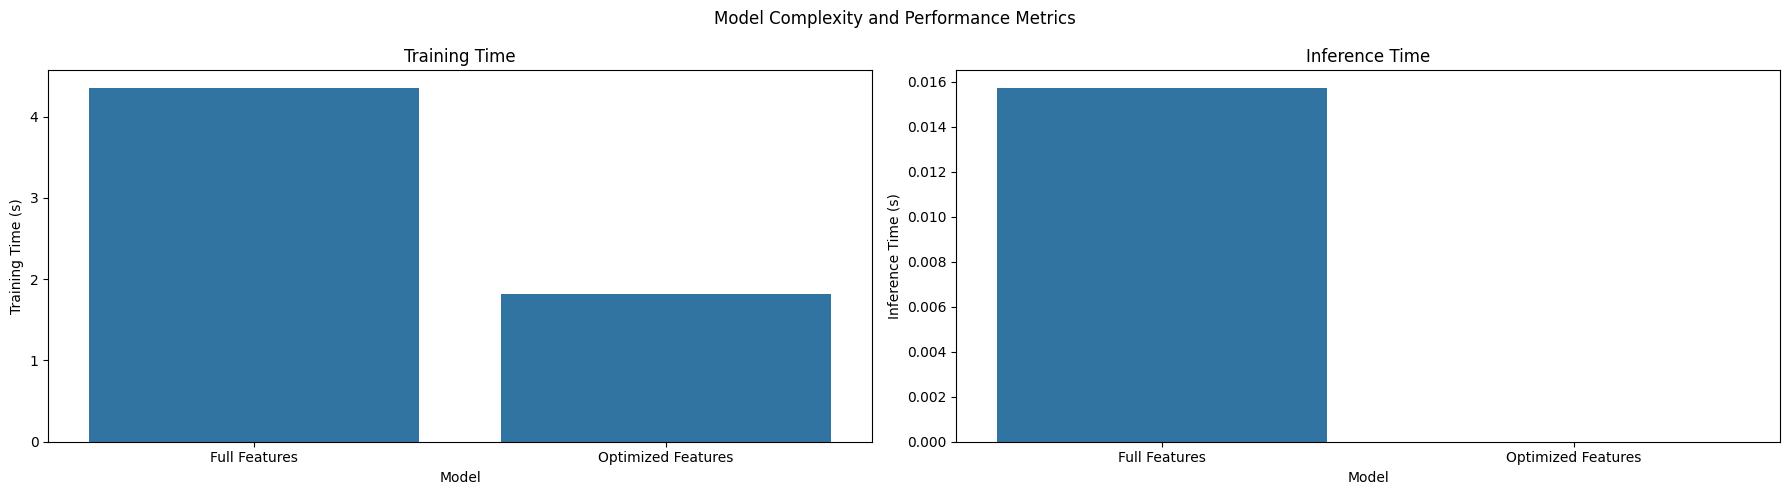

In [20]:
# 📈 Visualization: Compare metrics using bar charts
fig, axes = plt.subplots(1, 2, figsize=(18, 5))

sns.barplot(x='Model', y='Training Time (s)', data=summary_df, ax=axes[0])
axes[0].set_title('Training Time')

sns.barplot(x='Model', y='Inference Time (s)', data=summary_df, ax=axes[1])
axes[1].set_title('Inference Time')

plt.suptitle("Model Complexity and Performance Metrics")
plt.tight_layout()
plt.show()

In [21]:
# 📌 Conclusion:
# The optimized Gradient Boosting model reduces training and inference time, 
# shrinks feature count from 63 to 8, and reduces model size with a slightly better F1 score.